# Dry Thermodynamics

In [3]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as path
import numpy as np 

In [4]:
# Useful constants which come up often. All given in SI units, any conversion must be done in place
K_b = 1.3806*10**(-23)  # Boltzmann's constant, J / K
Mu = 1.6605*10**(-27)   # Atomic Mass unit, kg
R = K_b / Mu      # Molar gas constant, J / (K*kg) = (m/s)^2 * K
Mol = 1 / Mu
P_surface = 10**5
T_0 = 273.15      # Kelvin vs Degrees offset
# Earth 
g = 9.81        # m/s^2
R_over_Cp = 2/7 # For diatomic gasses (dimensionless)
R_e = 6.3716    # m

# Dry earth air params
N2_conc = 0.78084 
O2_conc = 0.20947
Ar_conc = 0.00934
N2_mass = 28 # kg / mol
O2_mass = 32 # kg / mol
Ar_mass = 40 # kg / mol
Dry_Air_Mass = (N2_conc * N2_mass) + (O2_conc * O2_mass) + (Ar_conc * Ar_mass) #kg / mol 
Dry_Air_Gas_Constant = R / Dry_Air_Mass 

## Pressure as a Vertical Coordinate

From an equation of hydrostatic balance, we obtain $\frac{dp}{dz}$ = - $\rho$g. This can be rearranged to $\frac{dp}{dz}$ = -$\frac{P}{RT}$g. Assuming constant T, This then gives $P(z) = P_s e^{-\frac{g}{RT}Z}$

In [5]:
# Here, we make an approximate comparison of the altitude to which a given temperature level corresponds. We do this using a dry atmosphere, and 
# assuming that T does not vary strongly throughout it.
# First, we write an expression that can tell us the approximate pressure at some altitude in the atmosphere. 
def AltitudeToPressure(Altitude, T):
    return P_surface * np.exp((- g / (Dry_Air_Gas_Constant * T)) * Altitude)
# This is the inverse function of the one above, where we now take a list of pressures and convert it to a set of altitudes. This can be useful if, 
# for example, we hope to find the height of the tropopause on a given atmospheric sounding.
def PressureToAltitude(Pressure):
    return np.log(P_surface / Pressure) * Dry_Air_Gas_Constant * T_0 / g

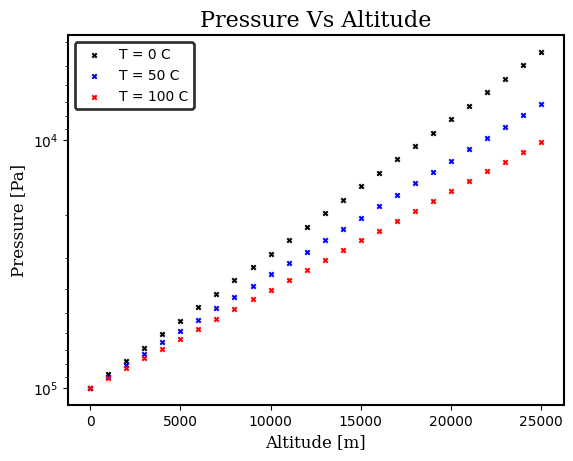

In [6]:
alts = np.linspace(0, 25000, 26)
ps  = AltitudeToPressure(alts, T_0)
ps2 = AltitudeToPressure(alts, T_0+50)
ps3 = AltitudeToPressure(alts, T_0+100)
plt.scatter(alts, ps, marker = 'x', s = 10, color = 'black', label = 'T = 0 C')
plt.scatter(alts, ps2, marker = 'x', s = 10, color = 'blue', label = 'T = 50 C')
plt.scatter(alts, ps3, marker = 'x', s = 10, color = 'red', label = 'T = 100 C')


# Essential formatting
plt.xlabel('Altitude [m]', font = 'serif', fontsize = 12)
plt.ylabel('Pressure [Pa]', font = 'serif', fontsize = 12)
Legend = plt.legend()
plt.gca().invert_yaxis()
plt.title('Pressure Vs Altitude', font = 'serif', fontsize = 16)
plt.yscale('log')

# Optional formatting
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)

frame = Legend.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(2)  # Adjust the thickness of the legend box border


At higher surface temperatures, the density of gasses will be lower. From our hydrostatic relation, we immediately see that this will result in the rate of change of pressure being lower in the atmosphere. 

## Potential Temperature 

In [7]:
# These functions answer two different questions we may have relating to potential temperature when considering an atmospheric sounding. 
# We ask the first function asks: what is the dry adiabat that would be followed by a parcel of air if it rose from the surface?
def PotentialTAscending(Surface_P, Surface_T, P, R_over_C_p):
    return Surface_T * (P / Surface_P)**(R_over_C_p)
# We ask the second function asks what is the potentail temperature of a parcel if moved to the surface. In other words, if we took that parcel at a given
# pressure and temperature, and compressed it adiabatically down to surface pressure, how hot would it be?
def Potential_Temperature(Current_P, Current_T, Surface_P, R_over_C_p):
    return Current_T * (Surface_P / Current_P)**(R_over_C_p)

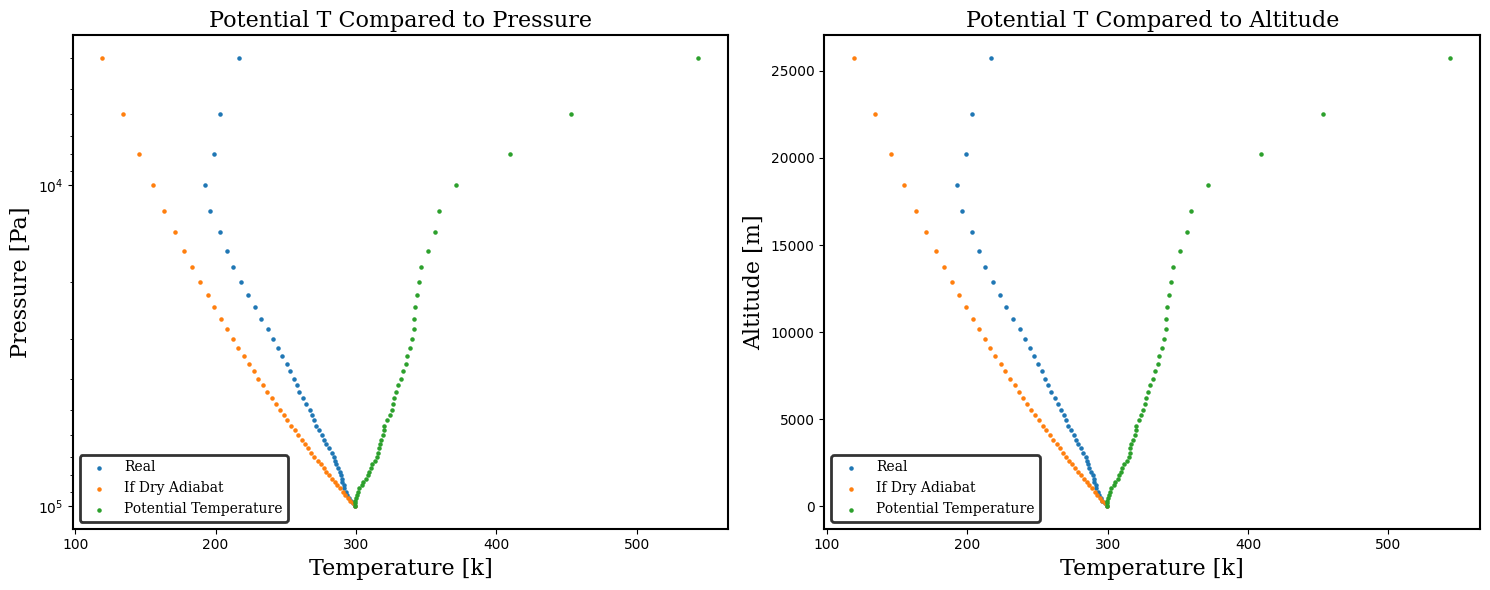

In [9]:
# Load some atmospheric sounding into working directory and then this cell returns the dry adiabat followed by a parcel rising from the surface, 
# along with the potential temperature of a 
df = pd.read_csv("Datasets/Atmospheric_Sounding.txt", delimiter = "\t") 

y = df['p'] * 100
z = PressureToAltitude(y)
x = df['T']
Dry_Adiabat_T = PotentialTAscending(Surface_P = y[0], Surface_T = x[0], P = y, R_over_C_p = 2/7) 
Potential_T   = Potential_Temperature(Current_P = y, Current_T = x, Surface_P = y[0], R_over_C_p = 2/7)
Dry_Adiabat_Potential_T = Potential_Temperature(Current_P = y, Current_T = Dry_Adiabat_T, Surface_P = y[0], R_over_C_p = 2/7)
# To see how these properties look when compared against pressure and altitude we provide 2 subplots with each of these on. 
# Pressure subplot
fig, axs_real = plt.subplots(1, 2, figsize=(15, 6))
axs_real[0].scatter(x, y, label = 'Real', s = 5)
axs_real[0].scatter(Dry_Adiabat_T, y, label = 'If Dry Adiabat', s = 5)
axs_real[0].scatter(Potential_T, y, label = 'Potential Temperature', s = 5)
# axs_real[0].scatter(Dry_Adiabat_Potential_T, y, label = 'tester')
axs_real[0].set_title('Potential T Compared to Pressure', fontname='serif', fontsize=16)
axs_real[0].set_xlabel('Temperature [k]', fontname='serif', fontsize=16)
axs_real[0].set_ylabel('Pressure [Pa]', fontname='serif', fontsize=16)
axs_real[0].set_yticks([100000, 75000, 50000, 25000, 10000, 4000])
axs_real[0].invert_yaxis()
axs_real[0].set_yscale('log')
legend0 = axs_real[0].legend(prop={'family': 'serif'}, fontsize=12)

# Altitude subplot
axs_real[1].scatter(x, z, label = 'Real', s = 5)
axs_real[1].scatter(Dry_Adiabat_T, z, label = 'If Dry Adiabat', s = 5)
axs_real[1].scatter(Potential_T, z, label = 'Potential Temperature', s = 5)
axs_real[1].set_title('Potential T Compared to Altitude', fontname='serif', fontsize=16)
axs_real[1].set_xlabel('Temperature [k]', fontname='serif', fontsize=16)
axs_real[1].set_ylabel('Altitude [m]', fontname='serif', fontsize=16)
legend1 = axs_real[1].legend(prop={'family': 'serif'}, fontsize=12)

# Some nice formatting
# Thickening borders of the subplots
for ax in axs_real:
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
# Adding a black box around each legend
for legend in [legend0, legend1]:
    frame = legend.get_frame()
    frame.set_edgecolor('black')
    frame.set_linewidth(2)  # Adjust the thickness of the legend box border

plt.tight_layout()
plt.show()

Note that on these plots, slight curvature is seen on the 'If Dry Adiabat' line on the 'Potential T Compared to Altitude' plot. This is not what is predicted by theory. We see this curvature because we convert pressure to altitude assuming a linear temperature. One could solve the ode for pressure as a function of altitude numerically, with T gotten from the dry adiabat. That would result in altitude - pressure mappings being more exact and the 'If Dry Adiabat' line being straight.

## CAPE, CIN, et al. 

In [10]:
def DryAdiabat(T_0, P_0, R_over_C_p):
    Pressures = np.linspace(10000, P_0, 41)
    Temperatures = PotentialTAscending(P_0, T_0, Pressures, R_over_C_p)
    return Pressures, Temperatures

## Misc

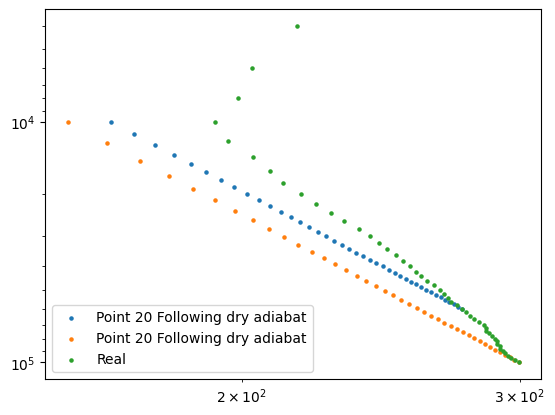

In [11]:
start_at = 20
Start_Point = [x[start_at], y[start_at]]
Pressures, Temperatures = DryAdiabat(T_0 = Start_Point[0], P_0 = Start_Point[1], R_over_C_p = 2/7)
start_at2 = 0
Start_Point2 = [x[start_at2], y[start_at2]]
Pressures2, Temperatures2 = DryAdiabat(T_0 = Start_Point2[0], P_0 = Start_Point2[1], R_over_C_p = 2/7)
plt.scatter(Temperatures, Pressures, s = 5, label = f'Point {start_at} Following dry adiabat')
plt.scatter(Temperatures2, Pressures2, s = 5, label = f'Point {start_at} Following dry adiabat')

plt.scatter(x, y, label = 'Real', s = 5)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()